In [39]:
import numpy as np
import matplotlib.pyplot as plt
from turbustat.statistics import PowerSpectrum
from astropy.io import fits
import astropy.units as u

In [48]:
plt.style.use("ggplot")

In [49]:
data_ = np.load("drive/MyDrive/data_spectrum.npy")

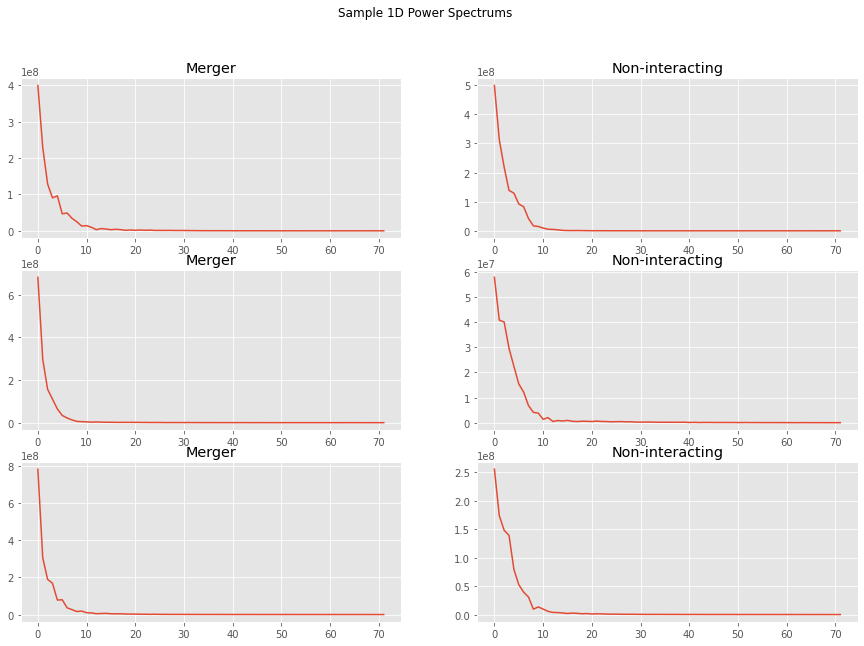

In [50]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10));
fig.suptitle("Sample 1D Power Spectrums");

ax[0, 0].set_title("Merger");
ax[0, 0].plot(data[10][:-1]);

ax[0, 1].set_title("Non-interacting");
ax[0, 1].plot(data[8000][:-1]);

ax[1, 0].set_title("Merger");
ax[1, 0].plot(data[100][:-1]);

ax[1, 1].set_title("Non-interacting");
ax[1, 1].plot(data[10000][:-1]);

ax[2, 0].set_title("Merger");
ax[2, 0].plot(data[200][:-1]);

ax[2, 1].set_title("Non-interacting");
ax[2, 1].plot(data[12000][:-1]);

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_ = scaler.fit_transform(data_)

In [12]:
labels = np.concatenate((np.ones(6000), np.zeros(10000)))
# data_final = np.hstack((data_, np.atleast_2d(labels).T)) # shape = (16000, 73)

In [13]:
import pandas as pd

X = pd.DataFrame(data_[:, :-1])
y = pd.Series(labels)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=1, stratify=y)  # shuffle=True is important since the data before splitting consists of all classes' examples together.

In [15]:
pd.Series(y_train).value_counts()

0.0    7000
1.0    4200
dtype: int64

In [16]:
import xgboost as xgb

In [17]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 'min_child_weight': [1,2,3,4]
cv_params = {'max_depth': [4, 8, 12], 'n_estimators': [200, 400, 600], 'learning_rate': [0.01, 0.1, 0.001]}
fix_params = {'objective': 'binary:logistic'}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring='f1', cv=5)
csv.fit(X_train, y_train)

In [ ]:
# csv.grid_scores_
csv.best_params_

{'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 400}

In [ ]:
# Using the best params from GridSearch.
param_dist = {"learning_rate": 0.01, "n_estimators": 400, "reg_lambda": 1e-04, "max_depth": 12, "use_label_encoder": False}
clf = xgb.XGBRFClassifier(**param_dist)
clf.fit(X_train, y_train, verbose=True)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=0.01,
                max_delta_step=0, max_depth=12, min_child_weight=1,
                missing=None, n_estimators=400, n_jobs=1, nthread=None,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                reg_lambda=0.0001, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.8, use_label_encoder=False, verbosity=1)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
acc = np.mean(y_pred == y_test)
print(acc)

0.7308333333333333


In [35]:
from sklearn.metrics import  confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[2529  471]
 [ 821  979]]


              precision    recall  f1-score   support

         0.0       0.75      0.84      0.80      3000
         1.0       0.68      0.54      0.60      1800

    accuracy                           0.73      4800
   macro avg       0.72      0.69      0.70      4800
weighted avg       0.73      0.73      0.72      4800



In [28]:
# # A more finer search.
# cv_params = {'max_depth': [8, 12], 'n_estimators': [400, 800], 'learning_rate': [0.01, 0.1, 0.001]}
# fix_params = {'objective': 'binary:logistic'}
# csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring='f1', cv=5)
# csv.fit(X_train, y_train)

# Using the best params from GridSearch.
param_dist = {"learning_rate": 0.01, "n_estimators": 1000, "reg_lambda": 1e-04, "max_depth": 12, "use_label_encoder": False}
clf = xgb.XGBRFClassifier(**param_dist)
clf.fit(X_train, y_train, verbose=True)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=0.01,
                max_delta_step=0, max_depth=12, min_child_weight=1,
                missing=None, n_estimators=1000, n_jobs=1, nthread=None,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                reg_lambda=0.0001, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.8, use_label_encoder=False, verbosity=1)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
acc = np.mean(y_pred == y_test)
print(acc)

0.73125


In [36]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[2528  472]
 [ 818  982]]


              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80      3000
         1.0       0.68      0.55      0.60      1800

    accuracy                           0.73      4800
   macro avg       0.72      0.69      0.70      4800
weighted avg       0.73      0.73      0.72      4800



In [31]:
# # A more finer search.
# cv_params = {'max_depth': [8, 12], 'n_estimators': [400, 800], 'learning_rate': [0.01, 0.1, 0.001]}
# fix_params = {'objective': 'binary:logistic'}
# csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring='f1', cv=5)
# csv.fit(X_train, y_train)

# Using the best params from GridSearch.
param_dist = {"learning_rate": 0.01, "n_estimators": 1500, "reg_lambda": 1e-04, "max_depth": 12, "use_label_encoder": False}
clf = xgb.XGBRFClassifier(**param_dist)
clf.fit(X_train, y_train, verbose=True)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=0.01,
                max_delta_step=0, max_depth=12, min_child_weight=1,
                missing=None, n_estimators=1500, n_jobs=1, nthread=None,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                reg_lambda=0.0001, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.8, use_label_encoder=False, verbosity=1)

In [32]:
y_pred_ = clf.predict(X_test)

In [33]:
acc_ = np.mean(y_pred_ == y_test)
print(acc_)

0.7295833333333334


In [ ]:
## Custom GridSearch...
## --------------------


# n_estms = [800, 1000]
# max_depths = [9, 12]
# learning_rates = [0.01, 0.001]

# best_acc = -1
# for n_estm in n_estms:
#   for max_depth in max_depths:
#     for lr in learning_rates:
#       param_dist = {"learning_rate": lr, "n_estimators": n_estm, "reg_lambda": 1e-04, "max_depth": max_depth, "use_label_encoder": False}  # increasing `max_depth` increases accuracy from ~77 to ~85!
#       clf = xgb.XGBRFClassifier(**param_dist)
#       clf.fit(X_train, y_train, verbose=True)  # SEE https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor.evals_result FOR better options
#       y_pred = clf.predict(X_test)
#       acc = np.mean(y_pred == y_test)
#       if acc > best_acc:
#         best_acc = acc
#         print(f"lr: {lr}, max_depth: {max_depth}, n_estm: {n_estm}")